In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## What is data augmentation

- Data augmentation is a technique commonly used in machine learning and computer vision to artificially increase the size of a dataset by applying various transformations to the original data. The idea is to generate new examples that are similar to the original data, but with variations that make the model more robust to different scenarios and improve its generalization performance.

- Some common data augmentation techniques include:

   - Flipping and rotating images
   - Cropping and resizing images
   - Adding noise or distortion to images
   - Changing the brightness, contrast, or color of images
-Randomly applying combinations of these transformations
For example, in image classification tasks, data augmentation can be used to generate new training images by randomly flipping, rotating, or cropping the original images. This can help the model learn to recognize the same object from different angles and orientations.

In [6]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
#untar= true means it is zip file unzip this file
#cachee_dir=store this file in this directory


In [7]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib#toread the flower image one by one pathlib help us
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [11]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [13]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

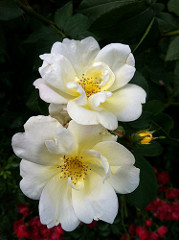

In [14]:
PIL.Image.open(str(roses[0]))

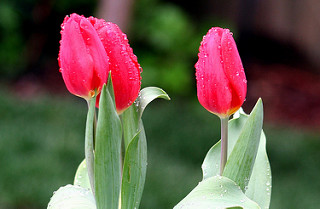

In [18]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [19]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [21]:
flower_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [22]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}#labels  dictionary assinging class no to each of flower


In [24]:
str(flower_images_dict['roses'][0])
# we are converting the window path into str path because opencv reads only string path

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [29]:
#opencv just read the image from disk and converted into 03 dimenesional array
img=cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [26]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [30]:
#now we are preparing X_train and y_train
X,y=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))#read the image
        resize_img=cv2.resize(img,(180,180))#resize into 180*180
        X.append(resize_img)#appending the image into X
        y.append(flower_labels_dict[flower_name])#appending the image labels that we specify in the label dictionary that we adding in y
        
#     print(flower_name)
#     print(len(images))

In [31]:
X=np.array(X)
y=np.array(y)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [33]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [34]:
X_train_scaled[0]

array([[[0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.96078431],
        [0.87843137, 0.91372549, 0.96470588],
        ...,
        [0.65490196, 0.74901961, 0.81960784],
        [0.6       , 0.70588235, 0.76862745],
        [0.55686275, 0.67058824, 0.72941176]],

       [[0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        [0.86666667, 0.90196078, 0.95294118],
        ...,
        [0.63529412, 0.72941176, 0.8       ],
        [0.59215686, 0.69411765, 0.76078431],
        [0.56470588, 0.6745098 , 0.7372549 ]],

       [[0.87843137, 0.91372549, 0.96470588],
        [0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        ...,
        [0.61568627, 0.70980392, 0.77647059],
        [0.58431373, 0.68235294, 0.75294118],
        [0.57647059, 0.67843137, 0.74509804]],

       ...,

       [[0.89411765, 0.91764706, 0.9372549 ],
        [0.89803922, 0.9254902 , 0.94509804],
        [0.89411765, 0

The syntax layers.Conv2D(16,3,padding='same',activation='relu') creates a Conv2D layer object with the following parameters:

16: the number of filters, also known as output channels. Each filter represents a different feature that the model learns to recognize in the input data.
3: the size of the filters, represented as a tuple or list of two integers (height, width). In this case, the filters will be 3x3 pixels in size.
padding='same': the type of padding to use at the borders of the input data. same padding means that the output will have the same spatial dimensions as the input.
activation='relu': the activation function to apply to the output of the layer. relu (rectified linear unit) is a commonly used activation function that applies a non-linear transformation to the input, allowing the network to learn more complex patterns in the data.
So in summary, this layer will perform convolutional filtering on the input data with 16 filters of size 3x3, apply same padding to maintain the spatial dimensions, and apply the ReLU activation function to the output.







In [38]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
70/70 [==============================] - 30s 409ms/step - loss: 1.2534 - accuracy: 0.4318
Epoch 2/10
70/70 [==============================] - 28s 394ms/step - loss: 0.9439 - accuracy: 0.6050
Epoch 3/10
70/70 [==============================] - 29s 410ms/step - loss: 0.7916 - accuracy: 0.6800
Epoch 4/10
70/70 [==============================] - 28s 399ms/step - loss: 0.6467 - accuracy: 0.7531
Epoch 5/10
70/70 [==============================] - 32s 452ms/step - loss: 0.4675 - accuracy: 0.8335
Epoch 6/10
70/70 [==============================] - 28s 391ms/step - loss: 0.3170 - accuracy: 0.8900
Epoch 7/10
70/70 [==============================] - 26s 375ms/step - loss: 0.1846 - accuracy: 0.9457
Epoch 8/10
70/70 [==============================] - 26s 376ms/step - loss: 0.0950 - accuracy: 0.9731
Epoch 9/10
70/70 [==============================] - 26s 375ms/step - loss: 0.0455 - accuracy: 0.9888
Epoch 10/10
70/70 [==============================] - 26s 374ms/step - loss: 0.0471 - accura

In [39]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 3s 114ms/step - loss: 1.8833 - accuracy: 0.6231


[1.883290410041809, 0.6231493949890137]

In [43]:
prediction=model.predict(X_test_scaled)
prediction[0]

24/24 [==============================] - 3s 104ms/step


array([ -0.16854085,   2.5628607 ,   7.7552447 , -11.893102  ,
         0.6454669 ], dtype=float32)

In [44]:
score=tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.5960626e-04, 5.5215373e-03, 9.9330729e-01, 2.9101501e-09,
       8.1160798e-04], dtype=float32)>

In [45]:
np.argmax(score)

2

## Data augmentation

In [57]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape=(img_height,
                                                            img_width,
                                                            3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),#it is an api from tensorflow
])

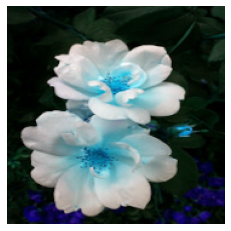

In [58]:
plt.axis('off')
plt.imshow(X[0])

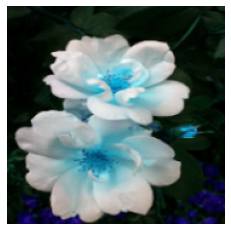

In [59]:
#zooming the image through api of tensorflow
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [ ]:
#so we can  use this data augmentation to produce more sample

### Building the augmentation model that we seen above
-api doc for augmentation-https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom

In [62]:
num_classes=5
model=Sequential([
    data_augmentation,#here we add data augmentation
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),#and we are adding the droupout value
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
70/70 [==============================] - 50s 688ms/step - loss: 1.2362 - accuracy: 0.4349
Epoch 2/10
70/70 [==============================] - 44s 631ms/step - loss: 0.9875 - accuracy: 0.5857
Epoch 3/10
70/70 [==============================] - 32s 462ms/step - loss: 0.8953 - accuracy: 0.6333
Epoch 4/10
70/70 [==============================] - 41s 586ms/step - loss: 0.8195 - accuracy: 0.6697
Epoch 5/10
70/70 [==============================] - 36s 510ms/step - loss: 0.7768 - accuracy: 0.7038
Epoch 6/10
70/70 [==============================] - 38s 537ms/step - loss: 0.7318 - accuracy: 0.7240
Epoch 7/10
70/70 [==============================] - 31s 443ms/step - loss: 0.6857 - accuracy: 0.7352
Epoch 8/10
70/70 [==============================] - 31s 441ms/step - loss: 0.6226 - accuracy: 0.7581
Epoch 9/10
70/70 [==============================] - 31s 446ms/step - loss: 0.6210 - accuracy: 0.7702
Epoch 10/10
70/70 [==============================] - 32s 450ms/step - loss: 0.5585 - accura

In [64]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 3s 122ms/step - loss: 0.8458 - accuracy: 0.6703


[0.8458421230316162, 0.670255720615387]